In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Android Manifest Permissions

Nel mondo degli smartphone, le applicazioni **Android** sono ampiamente utilizzate per svolgere una vasta gamma di attività.
Tuttavia, affinché un'app possa funzionare correttamente, deve avere accesso a determinate risorse o funzionalità del dispositivo.
Questi accessi sono gestiti attraverso i **permessi delle applicazioni**, che sono specificati nel file **manifest** dell'applicazione.
I permessi delle applicazioni svolgono un ruolo cruciale per garantire la sicurezza e la privacy degli utenti.

In sintesi i permessi presenti nel file manifest di un'app Android sono le **autorizzazioni** che l'app deve avere per accedere a risorse o eseguire operazioni che potrebbero influire sulla privacy o sulla sicurezza dell'utente.
Le autorizzazioni vengono richieste dall'app durante l'installazione e l'utente deve acconsentire prima che l'app possa essere utilizzata.

I permessi sono elencati nel file manifest dell'app in un elemento <uses-permission>.
Il nome del permesso deve essere uno dei permessi predefiniti forniti da Android o un permesso personalizzato creato dall'app.

Ad esempio, l'elemento seguente richiede all'app l'autorizzazione per accedere alla posizione dell'utente e all'utilizzo della fotocamera:

```xml
<uses-permission android:name="android.permission.ACCESS_FINE_LOCATION" />
<uses-permission android:name="android.permission.CAMERA" />
```

La sicurezza è un aspetto fondamentale quando si tratta dei permessi delle applicazioni.
Quando un'app richiede determinati permessi, ciò significa che potrebbe accedere a funzionalità o risorse sensibili del dispositivo, come i dati personali dell'utente, la fotocamera, il microfono, i contatti o la posizione geografica.
Se un'app ottiene accesso non autorizzato a tali risorse, potrebbe compromettere la privacy dell'utente o causare potenziali danni.

Per garantire la sicurezza, **Google Play Store** e altri app store di terze parti hanno implementato rigorose politiche di revisione delle applicazioni.
Prima che un'applicazione venga pubblicata, viene esaminata per verificare che richieda solo i permessi necessari e che li utilizzi correttamente.
Gli utenti sono inoltre avvisati quando un'app richiede determinati permessi critici, consentendo loro di valutare attentamente se concedere o meno l'accesso.

# Dataset

In merito a quanto detto in precedenza, possiamo vedere l'insieme dei permessi che il sistema Android espone come un **vettore binario** di **flag**.

Ogni applicazione ha un *vettore di flag* $\mathbf{x} = (x_1, x_2, ..., x_d)$ associato, tale che:
- se $x_i = 1$ allora l'applicazione richiede l'utilizzo del permesso andorid indicizzato con $i$.
- $x_i = 0$ altrimenti.

Nel nostro dataset, associamo ad ogni elemento $\mathbf{x}$ una **label binaria**, che vale $0$ se l'applicazione è identificata come benigna e $1$ se maligna.

In [6]:
df = pd.read_csv('./android_permissions.csv')
df.shape

(29332, 87)

In [7]:
df.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [8]:
df.columns.values

array(['android.permission.GET_ACCOUNTS',
       'com.sonyericsson.home.permission.BROADCAST_BADGE',
       'android.permission.READ_PROFILE',
       'android.permission.MANAGE_ACCOUNTS',
       'android.permission.WRITE_SYNC_SETTINGS',
       'android.permission.READ_EXTERNAL_STORAGE',
       'android.permission.RECEIVE_SMS',
       'com.android.launcher.permission.READ_SETTINGS',
       'android.permission.WRITE_SETTINGS',
       'com.google.android.providers.gsf.permission.READ_GSERVICES',
       'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION',
       'android.permission.GET_TASKS',
       'android.permission.WRITE_EXTERNAL_STORAGE',
       'android.permission.RECORD_AUDIO',
       'com.huawei.android.launcher.permission.CHANGE_BADGE',
       'com.oppo.launcher.permission.READ_SETTINGS',
       'android.permission.CHANGE_NETWORK_STATE',
       'com.android.launcher.permission.INSTALL_SHORTCUT',
       'android.permission.android.permission.READ_PHONE_STATE',
       'android.permi

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29332 entries, 0 to 29331
Data columns (total 87 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   android.permission.GET_ACCOUNTS                                                29332 non-null  int64
 1   com.sonyericsson.home.permission.BROADCAST_BADGE                               29332 non-null  int64
 2   android.permission.READ_PROFILE                                                29332 non-null  int64
 3   android.permission.MANAGE_ACCOUNTS                                             29332 non-null  int64
 4   android.permission.WRITE_SYNC_SETTINGS                                         29332 non-null  int64
 5   android.permission.READ_EXTERNAL_STORAGE                                       29332 non-null  int64
 6   android.permission.RECEIVE_SMS        

In [10]:
df.describe()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
count,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.00000,29332.000000,...,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000
mean,0.226033,0.034263,0.045888,0.013603,0.005762,0.171690,0.060071,0.014114,0.11080,0.043741,...,0.029660,0.003887,0.033445,0.034297,0.949032,0.023728,0.023387,0.051718,0.003648,0.501159
std,0.418268,0.181907,0.209247,0.115837,0.075688,0.377117,0.237622,0.117964,0.31389,0.204521,...,0.169652,0.062222,0.179798,0.181994,0.219937,0.152204,0.151133,0.221461,0.060289,0.500007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Di seguito le **proporzioni** tra applicazioni benigne e maligne.

<AxesSubplot: xlabel='Label', ylabel='# occurrences'>

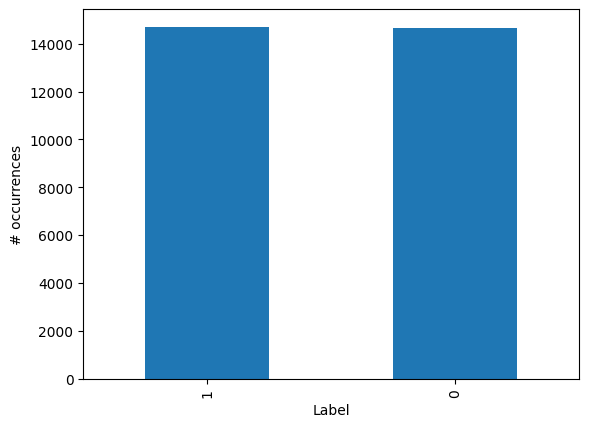

In [11]:
df["Result"].value_counts().plot(
    kind="bar",
    xlabel="Label",
    ylabel="# occurrences"
)

<AxesSubplot: ylabel='Result'>

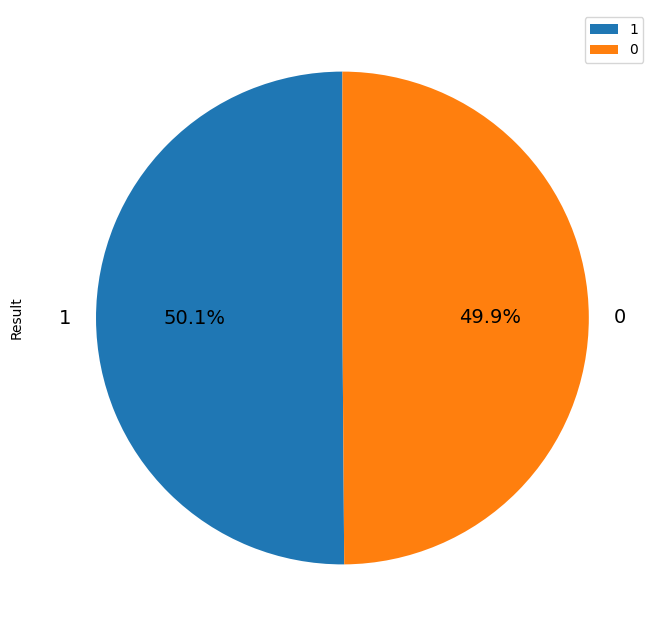

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df["Result"].value_counts().plot(
    kind="pie",
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    legend=True,
    fontsize=14,
    ax=ax
)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Result'], axis=1),
    df['Result'],
    test_size=0.4,
    random_state=42
)

X_train.shape, X_test.shape

((17599, 86), (11733, 86))

# Valuation

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.setp(
        ax.get_xticklabels(),
        rotation=45,
        ha='right',
        rotation_mode='anchor'
    )
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

def valuate(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, classes=clf.classes_, title='Confusion matrix')


# Decision Tree

In [127]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5864
           1       0.96      0.96      0.96      5869

    accuracy                           0.96     11733
   macro avg       0.96      0.96      0.96     11733
weighted avg       0.96      0.96      0.96     11733



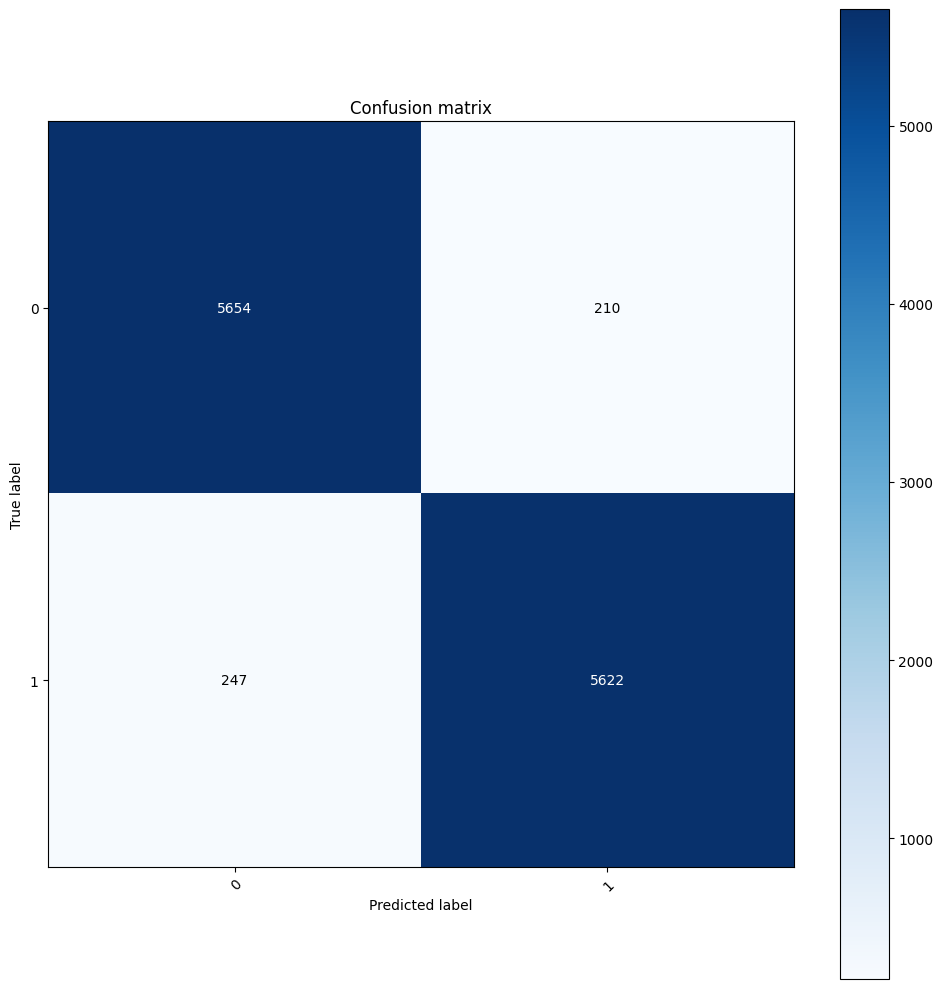

In [130]:
valuate(decision_tree, X_test, y_test)

In [131]:
from sklearn.model_selection import cross_validate

def k_fold_cross_val(
    model,
    X,
    y,
    k=10,
    scoring=('precision_macro', 'recall_macro'),
) -> None:
    

    scores = cross_validate(
        model,
        X,
        y,
        cv=10,
        scoring=['precision_macro', 'recall_macro']
    )

    print(f'{10}-fold cross validation:')
    print('Precision: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
    print('Recall: %0.2f (+/- %0.2f)' % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))

In [132]:
k_fold_cross_val(decision_tree, X_train, y_train)

10-fold cross validation:
Precision: 0.96 (+/- 0.01)
Recall: 0.96 (+/- 0.01)


# Bagging - Random Forset

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5864
           1       0.97      0.96      0.97      5869

    accuracy                           0.97     11733
   macro avg       0.97      0.97      0.97     11733
weighted avg       0.97      0.97      0.97     11733



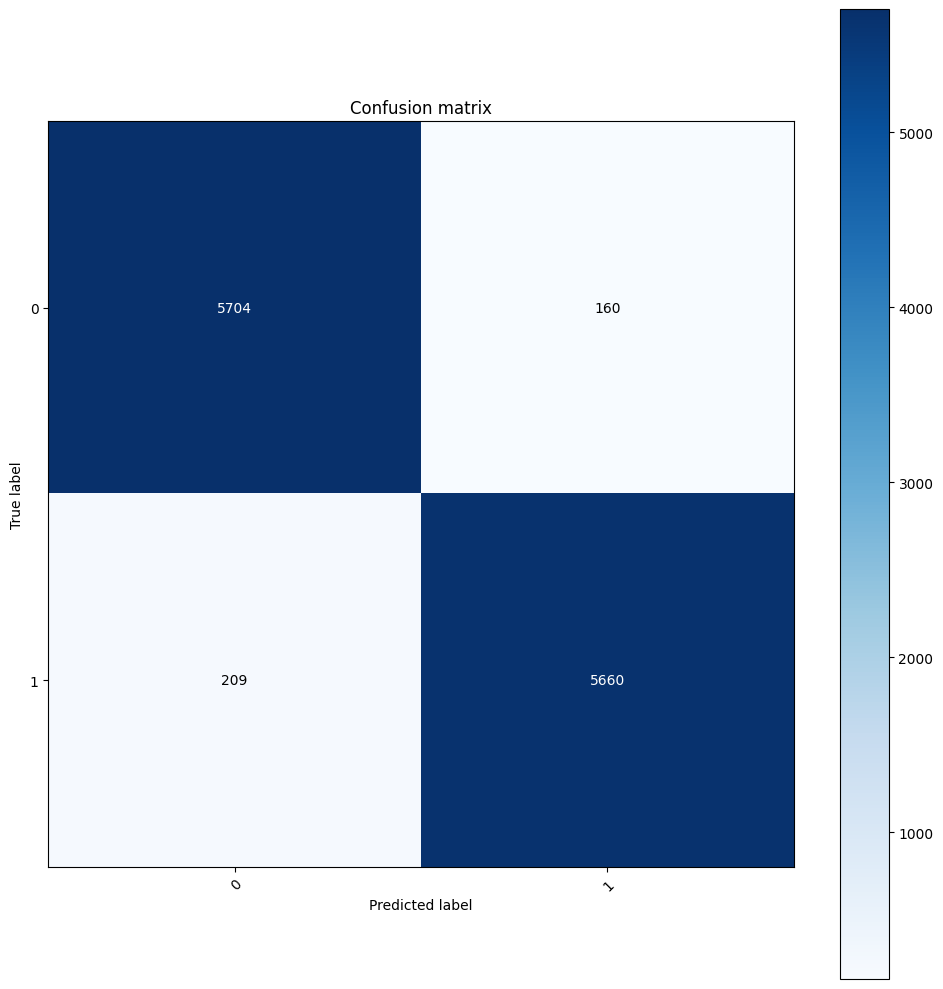

In [25]:
# Classify using Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

valuate(random_forest, X_test, y_test)

In [32]:
k_fold_cross_val(random_forest, X_train, y_train)

10-fold cross validation:
Precision: 0.97 (+/- 0.01)
Recall: 0.97 (+/- 0.01)


# Boosting

## Adaboost

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5864
           1       0.96      0.97      0.96      5869

    accuracy                           0.96     11733
   macro avg       0.96      0.96      0.96     11733
weighted avg       0.96      0.96      0.96     11733



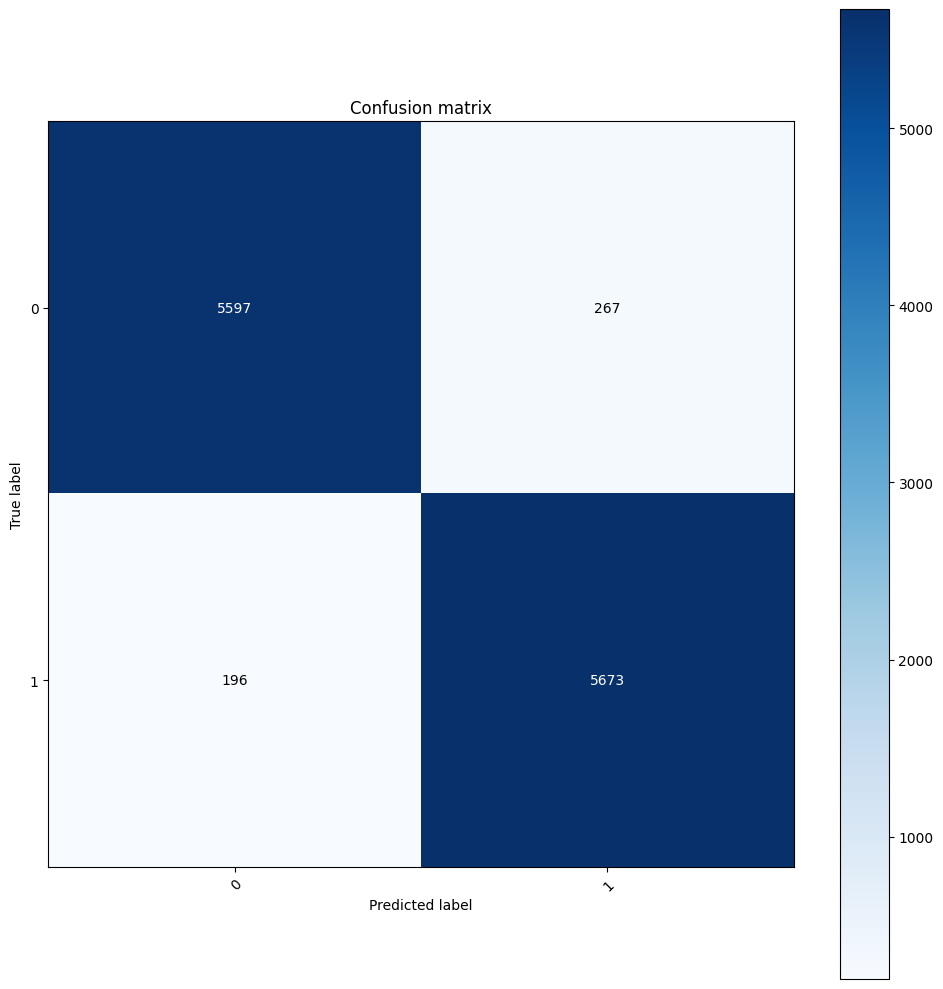

In [133]:
# Classify using Adaboost
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(X_train, y_train)

valuate(adaboost, X_test, y_test)

In [34]:
k_fold_cross_val(adaboost, X_train, y_train)

10-fold cross validation:
Precision: 0.96 (+/- 0.00)
Recall: 0.96 (+/- 0.00)


## Gradient Boosting

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5864
           1       0.96      0.97      0.96      5869

    accuracy                           0.96     11733
   macro avg       0.96      0.96      0.96     11733
weighted avg       0.96      0.96      0.96     11733



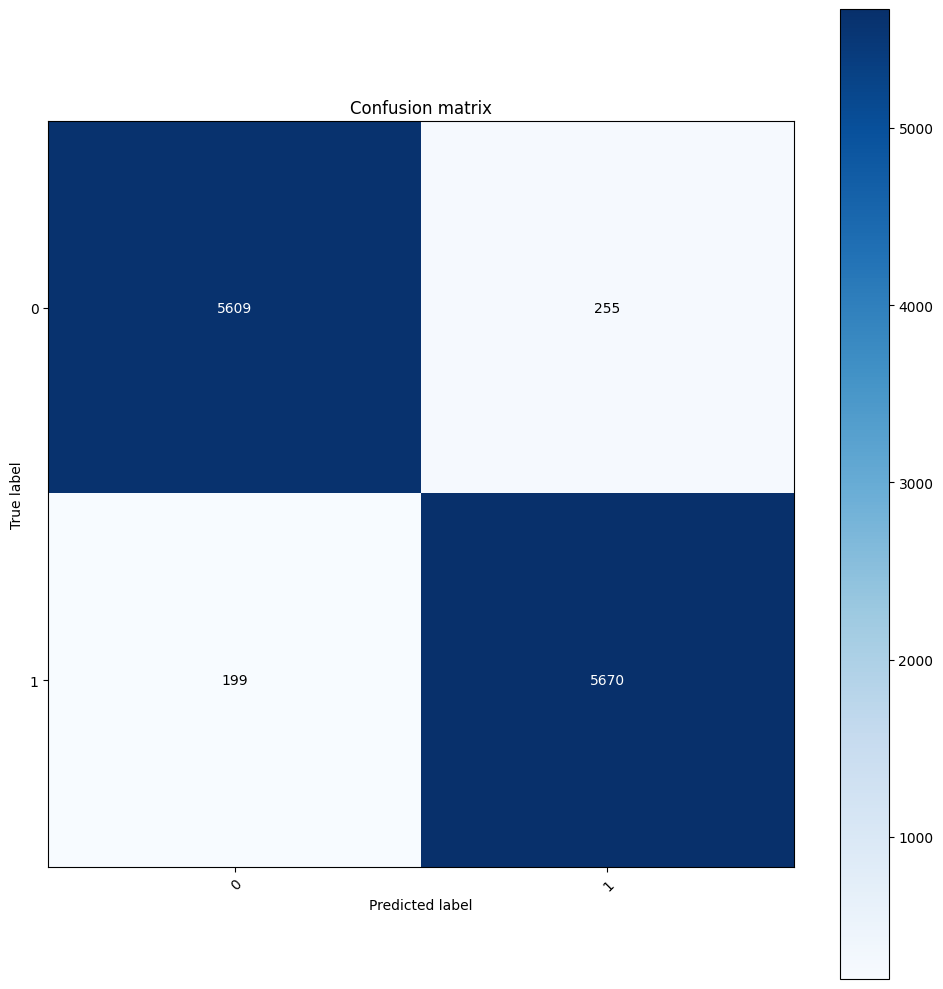

In [35]:
# Classify using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(n_estimators=100)
gradient_boosting.fit(X_train, y_train)

valuate(gradient_boosting, X_test, y_test)

In [36]:
k_fold_cross_val(gradient_boosting, X_train, y_train)

10-fold cross validation:
Precision: 0.96 (+/- 0.00)
Recall: 0.96 (+/- 0.00)


# KNN

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      5864
           1       0.94      0.97      0.96      5869

    accuracy                           0.96     11733
   macro avg       0.96      0.96      0.96     11733
weighted avg       0.96      0.96      0.96     11733



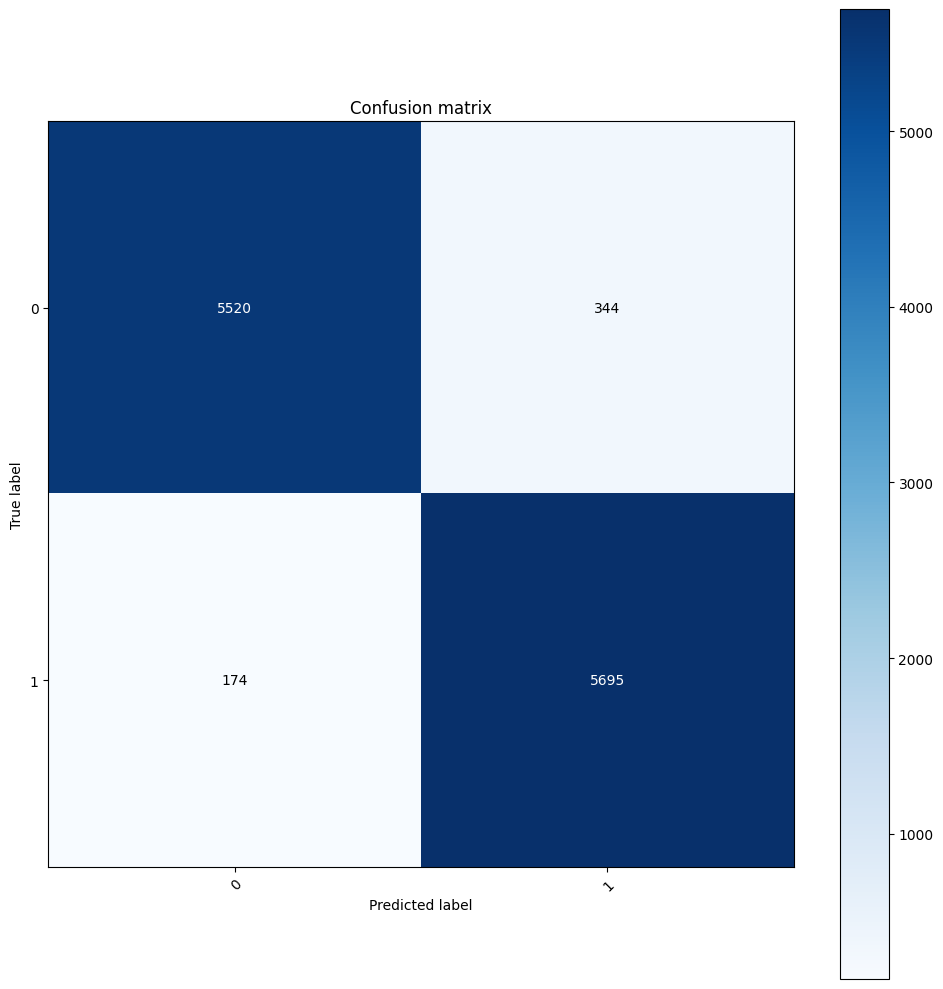

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

valuate(knn, X_test, y_test)

# Support Vector Machine

In [41]:
from sklearn import svm

C=1.0
models = (
    # svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=1000, dual=True),
    svm.SVC(kernel="rbf", gamma=0.7, C=C, max_iter=1000),
    #svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = [clf.fit(X_train, y_train) for clf in models]

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5864
           1       0.96      0.97      0.96      5869

    accuracy                           0.96     11733
   macro avg       0.96      0.96      0.96     11733
weighted avg       0.96      0.96      0.96     11733

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5864
           1       0.98      0.96      0.97      5869

    accuracy                           0.97     11733
   macro avg       0.97      0.97      0.97     11733
weighted avg       0.97      0.97      0.97     11733



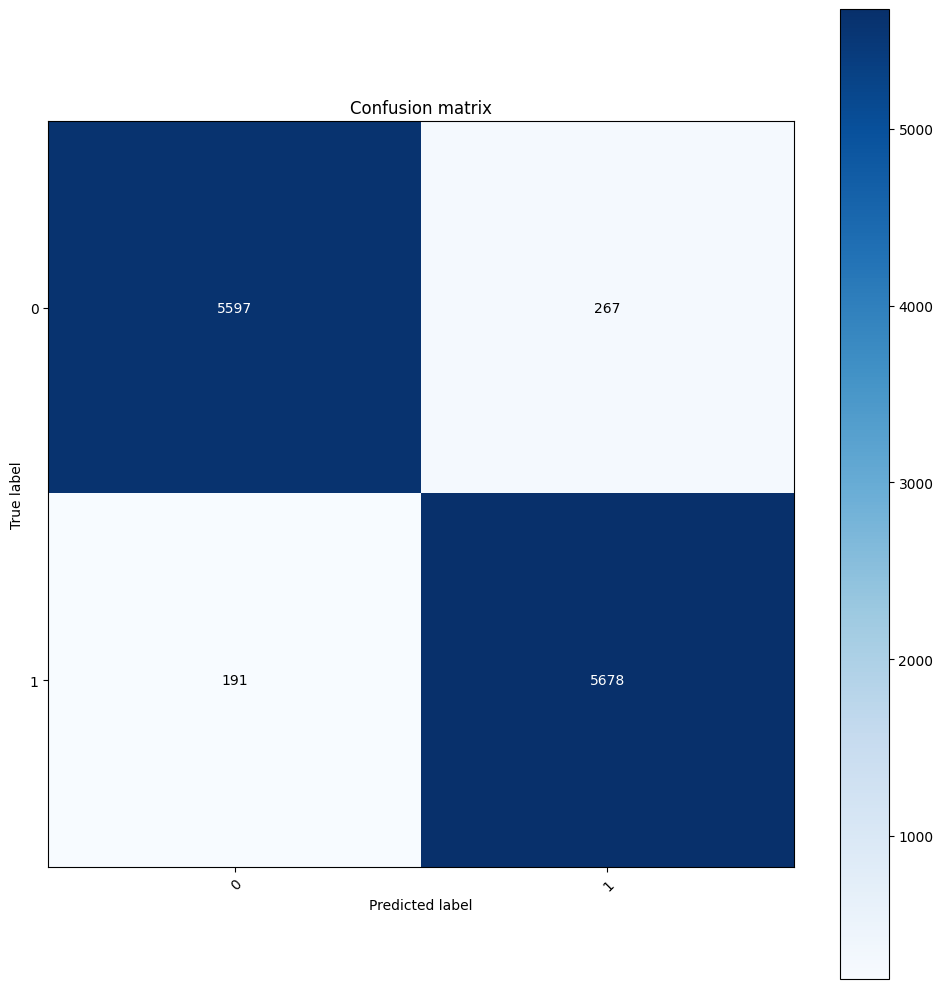

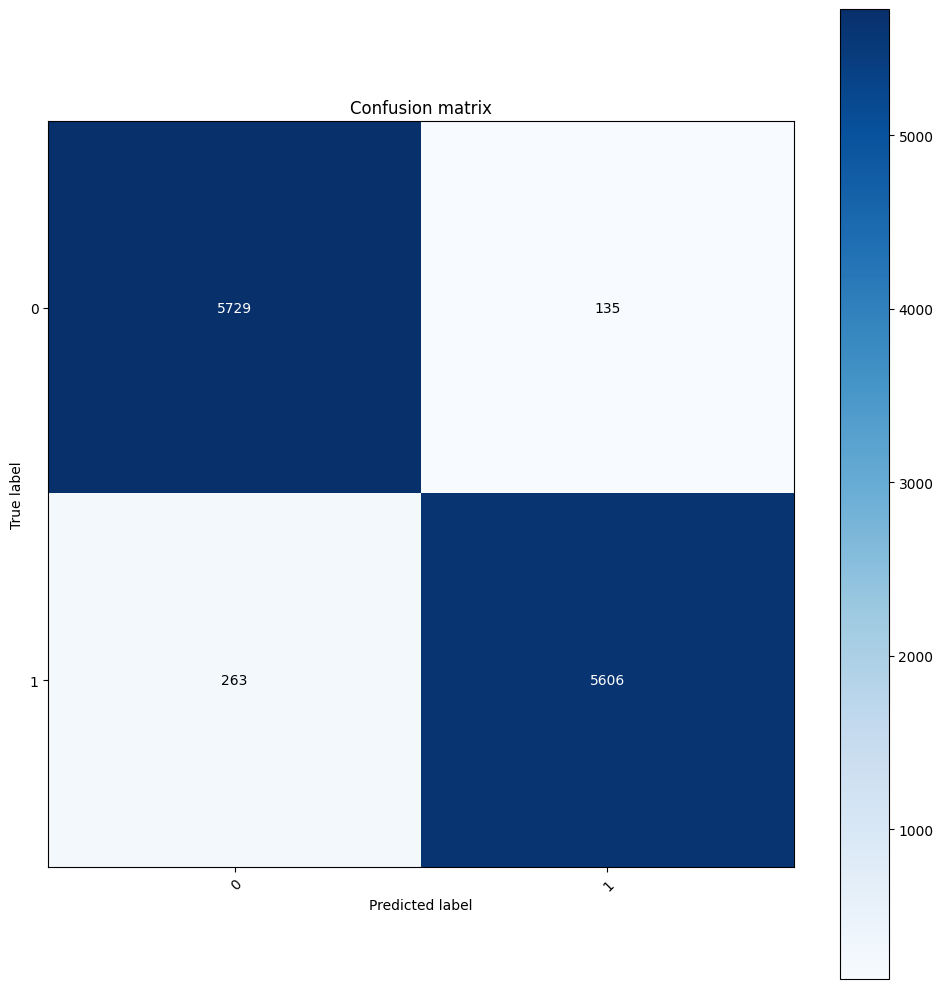

In [42]:
for clf in models:
    valuate(clf, X_test, y_test)

# Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5864
           1       0.96      0.97      0.96      5869

    accuracy                           0.96     11733
   macro avg       0.96      0.96      0.96     11733
weighted avg       0.96      0.96      0.96     11733



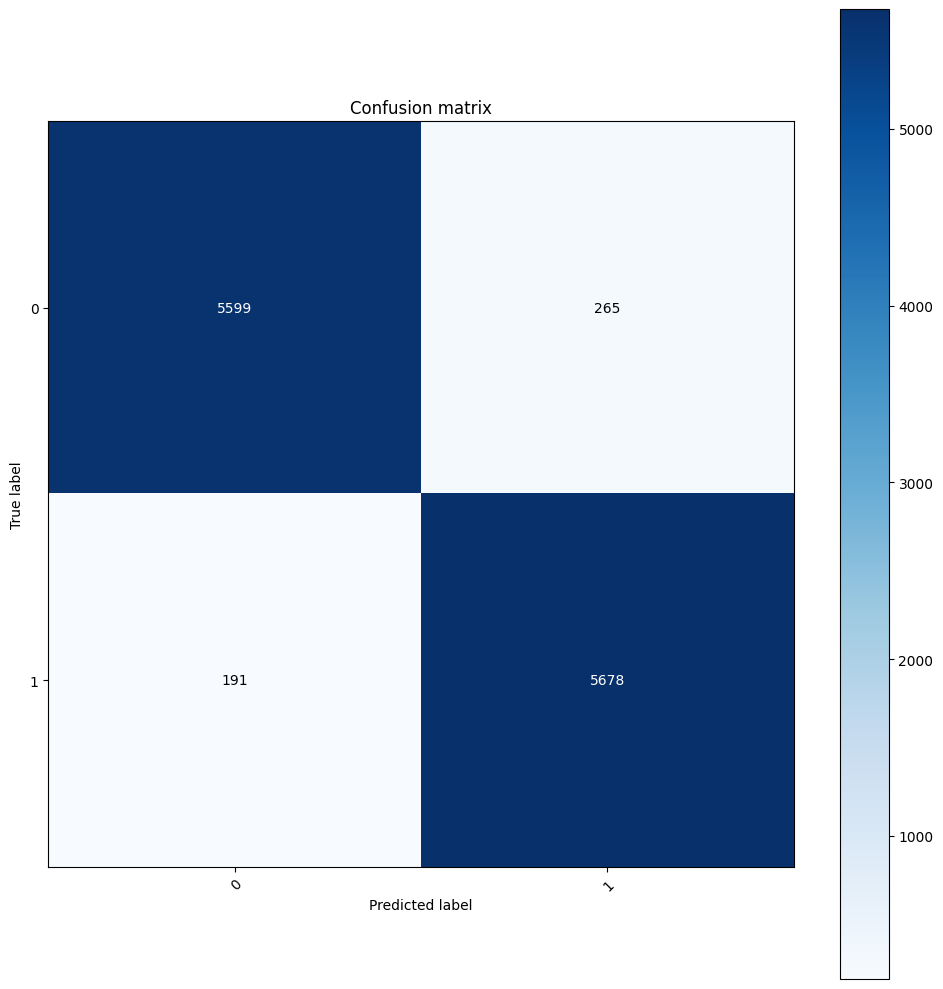

In [43]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=0, max_iter=100).fit(X_train, y_train)

valuate(logistic_classifier, X_test, y_test)

# Gaussian Discriminant Analysis

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      5864
           1       0.93      0.97      0.95      5869

    accuracy                           0.95     11733
   macro avg       0.95      0.95      0.95     11733
weighted avg       0.95      0.95      0.95     11733



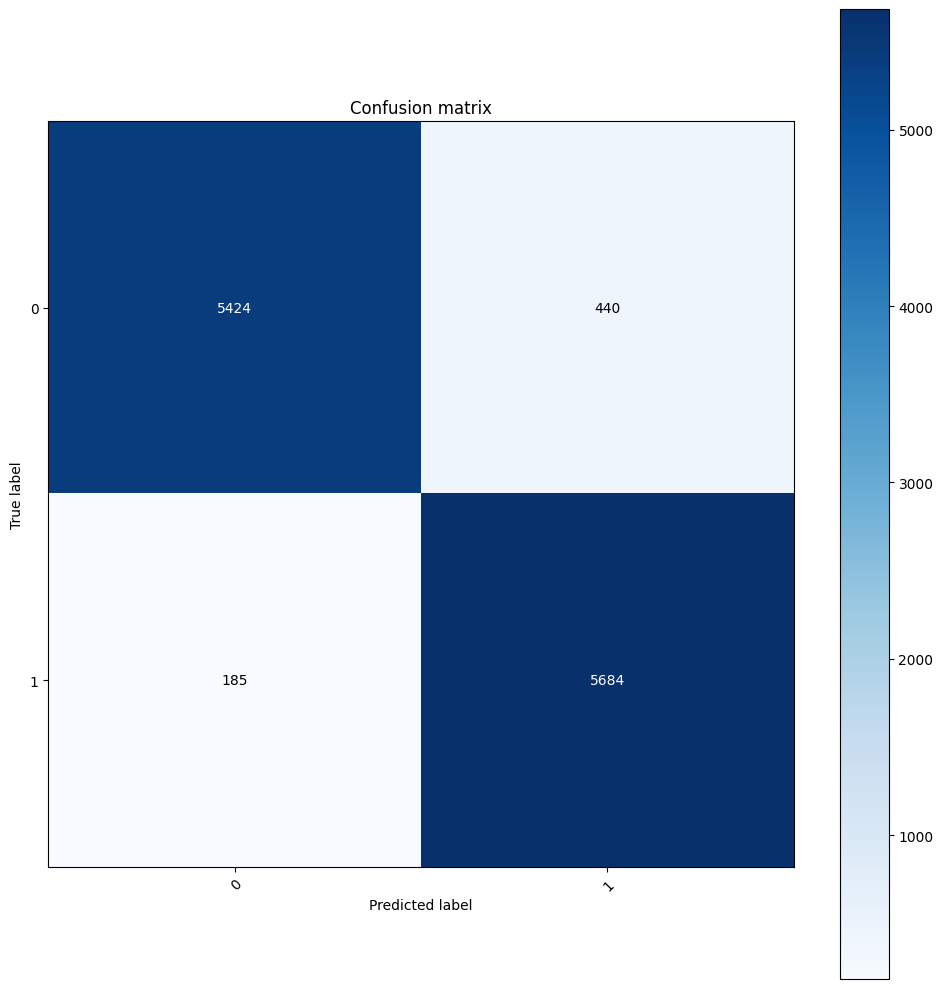

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis().fit(X_train, y_train)

valuate(lda_classifier, X_test, y_test)

# Multi Layer Perceptron

In [46]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [56]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(y):
    y = y.values.reshape(-1, 1)
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
    y = ohe.transform(y)
    return y

In [61]:
from torch import nn

class AndroidMalwareClassifierNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(86, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.hidden3 = nn.Linear(16, 4)
        self.act = nn.ReLU()
        self.output = nn.Linear(4, 2)

    def forward(self, x):
        x = self.act(self.hidden1(x))
        x = self.act(self.hidden2(x))
        x = self.act(self.hidden3(x))
        x = self.output(x)
        return x

In [57]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(one_hot_encoding(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(one_hot_encoding(y_test), dtype=torch.float32)

In [63]:
import copy
import tqdm
from torch import optim

model = AndroidMalwareClassifierNN()

# loss metric and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 8
batch_size = 200
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train_tensor[start:start+batch_size]
            y_batch = y_train_tensor[start:start+batch_size]

            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )

    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test_tensor)
    ce = loss_fn(y_pred, y_test_tensor)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test_tensor, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

Epoch 0: 100%|██████████| 87/87 [00:02<00:00, 39.87batch/s, acc=0.89, loss=0.488] 


Epoch 0 validation: Cross-entropy=0.47, Accuracy=90.0%


Epoch 1: 100%|██████████| 87/87 [00:02<00:00, 43.36batch/s, acc=0.94, loss=0.376] 


Epoch 1 validation: Cross-entropy=0.35, Accuracy=95.7%


Epoch 2: 100%|██████████| 87/87 [00:01<00:00, 49.21batch/s, acc=0.965, loss=0.335]


Epoch 2 validation: Cross-entropy=0.31, Accuracy=96.1%


Epoch 3: 100%|██████████| 87/87 [00:01<00:00, 50.20batch/s, acc=0.965, loss=0.305]


Epoch 3 validation: Cross-entropy=0.29, Accuracy=96.2%


Epoch 4: 100%|██████████| 87/87 [00:01<00:00, 47.48batch/s, acc=0.96, loss=0.28]  


Epoch 4 validation: Cross-entropy=0.26, Accuracy=96.3%


Epoch 5: 100%|██████████| 87/87 [00:02<00:00, 43.12batch/s, acc=0.96, loss=0.258] 


Epoch 5 validation: Cross-entropy=0.24, Accuracy=96.2%


Epoch 6: 100%|██████████| 87/87 [00:02<00:00, 39.26batch/s, acc=0.96, loss=0.241] 


Epoch 6 validation: Cross-entropy=0.23, Accuracy=96.3%


Epoch 7: 100%|██████████| 87/87 [00:01<00:00, 53.49batch/s, acc=0.96, loss=0.227] 


Epoch 7 validation: Cross-entropy=0.21, Accuracy=96.2%


<All keys matched successfully>

In [65]:
# print accuracy and loss
print(f"Best validation accuracy: {best_acc*100:.1f}%")
print(f"Final validation accuracy: {test_acc_hist[-1]*100:.1f}%")
print(f"Final validation loss: {test_loss_hist[-1]:.2f}")

Best validation accuracy: 96.3%
Final validation accuracy: 96.2%
Final validation loss: 0.21


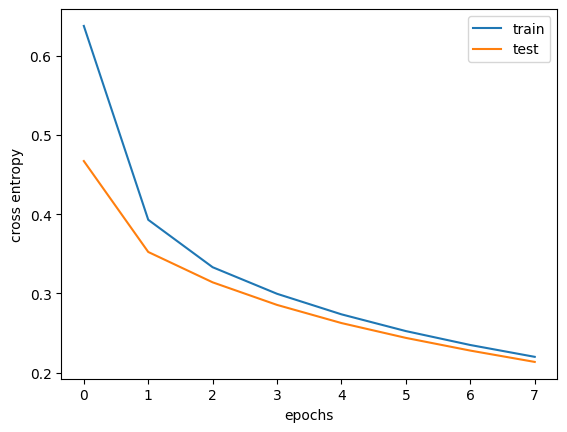

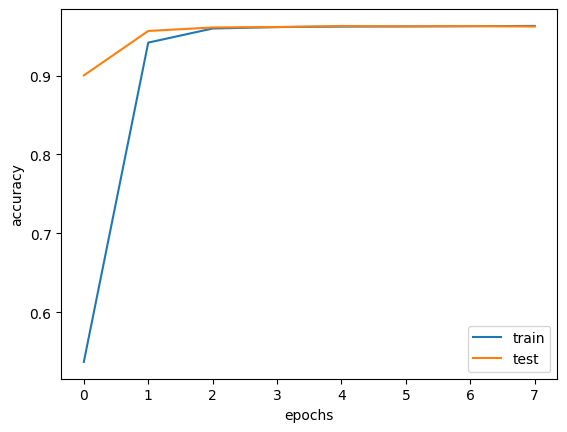

In [64]:
# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# Conclusioni

I risultati ottenuti dai modelli per la classificazione del malware basati sul traffico di rete e sui permessi delle app forniscono interessanti spunti di riflessione.
L'ipotesi è che le applicazioni maligne operino principalmente a **livello applicativo** anziché influenzare il comportamento dei protocolli di rete, il che potrebbe spiegare i risultati contrastanti ottenuti.
Anche se l'utilizzo della rete potrebbe essere un **comportamento distintivo** di un software maligno, sappiamo che i protolli di rete lavorano in modo **indipendente** dall'applicazione che li adopera.
Infatti le applicazioni non possono andare a modificare il comportamento dei protocolli di rete (dimensione dei pacchetti, flusso medio, ecc...), il quale è in genere controllato dal sistema operativo.
Ecco perché, a livello di rete, il traffico di un software maligno e il traffico di un software benigno risultano essere **indistinguibili**.

D'altra parte, i risultati eccellenti ottenuti utilizzando il dataset dei permessi delle app suggeriscono che l'analisi dei permessi può essere un indicatore molto utile per la rilevazione del malware.
Le applicazioni maligne spesso richiedono permessi sospetti o eccessivi, come l'accesso alla fotocamera, al microfono o ai dati personali, al fine di svolgere attività dannose per l'utente.
Quindi l'utilizzo dei permessi possono rapprentare un **pattern** per la distinzione di software dannosi e non, i quali possono essere facilmente appresi (come mostrato dai precedenti risultati).

# Sviluppi futuri riguardo la sicurezza
Gli algoritmi di machine learning adottati astraggono la semantica delle features dei dati e si limitano a fare predizioni di nuovi punti, a partire da un algoritmo preallenato su dati pre-eticattati. Un possibile sviluppo futuro riguardo la sicurezza dei sistemi informativi, potrebbe essere quella di selezionare le $k$ features più discriminative e analizzare come un'applicazione sfrutta questi permessi per eseguire un qualsiasi tipo di comportamento malevolo.
Ad esempio, per questo dataset, le features più discriminanti sono le seguenti:

In [24]:
# Select k best features from original df and print their names
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=10).fit_transform(df.iloc[:, :-1], df.iloc[:, -1:])
X_new.shape

df.iloc[:, :-1].columns[SelectKBest(chi2, k=10).fit(df.iloc[:, :-1], df.iloc[:, -1:]).get_support(indices=True)]

Index(['android.permission.WRITE_SETTINGS', 'android.permission.GET_TASKS',
       'com.android.launcher.permission.INSTALL_SHORTCUT',
       'android.permission.READ_PHONE_STATE',
       'com.google.android.c2dm.permission.RECEIVE',
       'android.permission.ACCESS_COARSE_LOCATION',
       'android.permission.SYSTEM_ALERT_WINDOW', 'com.android.vending.BILLING',
       'android.permission.RECEIVE_BOOT_COMPLETED',
       'android.permission.ACCESS_FINE_LOCATION'],
      dtype='object')

- `android.permission.WRITE_SETTINGS`: Permette all'applicazione di modificare le impostazioni del sistema, inclusi i parametri globali. I malware possono sfruttare questo permesso per alterare le impostazioni del dispositivo senza il consenso dell'utente, ad esempio modificando le impostazioni di connessione, audio o visualizzazione.
- `android.permission.GET_TASKS`: Consente all'applicazione di accedere alle informazioni sulle attività in esecuzione sul dispositivo. I malware possono utilizzare questo permesso per ottenere informazioni sensibili sulle attività dell'utente, come le app aperte o in esecuzione, e potenzialmente inviare tali informazioni a un server remoto senza il consenso dell'utente.
- `com.android.launcher.permission.INSTALL_SHORTCUT`: Consente all'applicazione di installare icone di shortcut sulla schermata principale del dispositivo. I malware possono utilizzare questo permesso per installare shortcut fraudolenti o ingannevoli sul dispositivo, che possono indirizzare l'utente a siti web dannosi o avviare app maligne.
- `android.permission.READ_PHONE_STATE`: Permette all'applicazione di accedere allo stato del telefono, inclusi il numero di telefono, le informazioni sulla rete cellulare e lo stato delle chiamate. I malware possono sfruttare questo permesso per raccogliere informazioni personali sull'utente, come il numero di telefono, l'IMEI o l'IMSI, e inviarle a terze parti senza il consenso dell'utente.
- `com.google.android.c2dm.permission.RECEIVE`: Consente all'applicazione di ricevere messaggi di notifica push dal servizio Google Cloud Messaging (GCM). I malware possono sfruttare questo permesso per ricevere e visualizzare notifiche di phishing o dirottare i messaggi di notifica legittimi per indurre l'utente a compiere azioni dannose o indesiderate.
- `android.permission.ACCESS_COARSE_LOCATION`: Permette all'applicazione di accedere all'ubicazione approssimativa del dispositivo. I malware possono utilizzare questo permesso per raccogliere informazioni sulla posizione dell'utente senza il suo consenso e utilizzarle per scopi malevoli, come inviare annunci pubblicitari mirati o tracciare l'utente.
- `android.permission.SYSTEM_ALERT_WINDOW`: Consente all'applicazione di visualizzare finestre sopra altre applicazioni o parti dell'interfaccia utente. I malware possono utilizzare questo permesso per mostrare finestre pop-up dannose o ingannevoli che possono ingannare l'utente o consentire operazioni non autorizzate.
- `com.android.vending.BILLING`: Permette all'applicazione di effettuare acquisti in-app attraverso Google Play Store. I malware possono sfruttare questo permesso per eseguire transazioni non autorizzate o fraudolente a spese dell'utente.
- `android.permission.RECEIVE_BOOT_COMPLETED`: Consente all'applicazione di avviarsi automaticamente una volta che il dispositivo si è avviato completamente. I malware possono sfruttare questo permesso per avviarsi in modo nascosto all'avvio del dispositivo e eseguire attività dannose in background senza il consenso dell'utente.
- `android.permission.ACCESS_FINE_LOCATION`: Permette all'applicazione di accedere all'ubicazione precisa del dispositivo. I malware possono utilizzare questo permesso per monitorare costantemente la posizione dell'utente, raccogliere informazioni sensibili sulla sua posizione e utilizzarle per scopi malevoli come il tracciamento o il targeting di utenti in situazioni di vulnerabilità.